# Taller 5.
## Analisis de Imagen
***
Oscar Eduardo Mejia  

201516790

In [1]:
%pylab inline
import scipy
from scipy import misc
from scipy import ndimage

Populating the interactive namespace from numpy and matplotlib


### Funciones Basicas

In [2]:
face = misc.face()

In [3]:
print(face)
print(face.shape, face.dtype)

[[[121 112 131]
  [138 129 148]
  [153 144 165]
  ...
  [119 126  74]
  [131 136  82]
  [139 144  90]]

 [[ 89  82 100]
  [110 103 121]
  [130 122 143]
  ...
  [118 125  71]
  [134 141  87]
  [146 153  99]]

 [[ 73  66  84]
  [ 94  87 105]
  [115 108 126]
  ...
  [117 126  71]
  [133 142  87]
  [144 153  98]]

 ...

 [[ 87 106  76]
  [ 94 110  81]
  [107 124  92]
  ...
  [120 158  97]
  [119 157  96]
  [119 158  95]]

 [[ 85 101  72]
  [ 95 111  82]
  [112 127  96]
  ...
  [121 157  96]
  [120 156  94]
  [120 156  94]]

 [[ 85 101  74]
  [ 97 113  84]
  [111 126  97]
  ...
  [120 156  95]
  [119 155  93]
  [118 154  92]]]
(768, 1024, 3) uint8


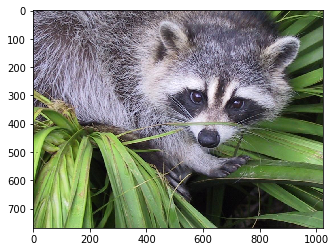

In [4]:
plt.imshow(face)

In [5]:
misc.imsave('face.png', face)

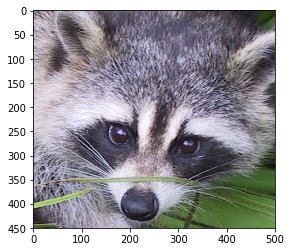

In [6]:
lx, ly = face.shape[0:2]
# Cropping
crop_face = face[50:500,400:900, :]
plt.imshow(crop_face)

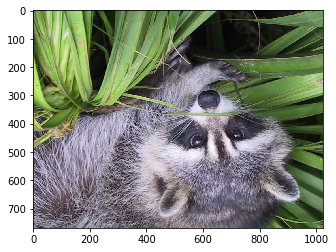

In [7]:
# Flip up - down
flip_ud_face = np.flipud(face)
plt.imshow(flip_ud_face)

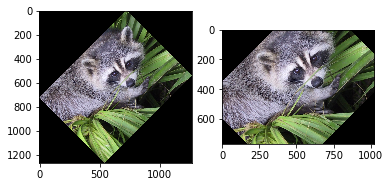

In [8]:
rotate_face = ndimage.rotate(face, 45)
rotate_face_noreshape = ndimage.rotate(face, 45, reshape=False)
plt.subplot(121)
plt.imshow(rotate_face)
plt.subplot(122)
plt.imshow(rotate_face_noreshape)

(-0.5, 1023.5, 767.5, -0.5)

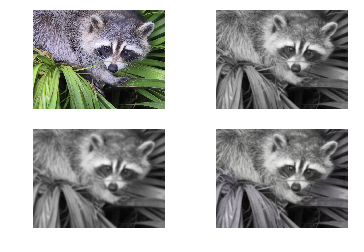

In [9]:
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred_face = ndimage.gaussian_filter(face, sigma=5)
local_mean_face = ndimage.uniform_filter(face, size=11)

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

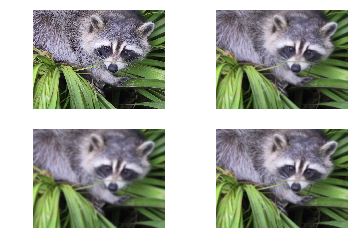

In [10]:

blurred_face = ndimage.gaussian_filter(face, sigma=(3, 3, 0))
very_blurred_face = ndimage.gaussian_filter(face, sigma=(5, 5, 0))
local_mean_face = ndimage.uniform_filter(face, size=(11, 11, 0))

plt.subplot(221)
plt.imshow(face)
plt.axis('off')
plt.subplot(222)
plt.imshow(blurred_face)
plt.axis('off')
plt.subplot(223)
plt.imshow(very_blurred_face)
plt.axis('off')
plt.subplot(224)
plt.imshow(local_mean_face)
plt.axis('off')

In [11]:
from skimage import feature

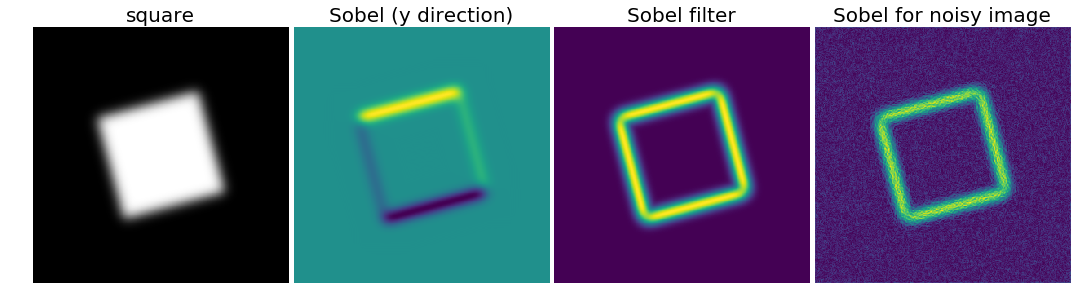

In [12]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 2

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 7)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (y direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im_noisy = im + 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im_noisy, axis=0, mode='constant')
sy = ndimage.sobel(im_noisy, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()

C:\Users\USER\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


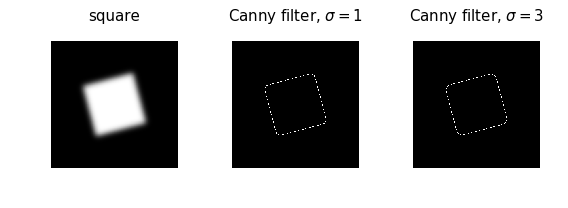

In [13]:

# Compute the Canny filter for two values of sigma
edges1 = feature.canny(im)
edges2 = feature.canny(im, sigma=3)

# display results
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3),
                                    sharex=True, sharey=True)

ax1.imshow(im, cmap=plt.cm.gray)
ax1.axis('off')
ax1.set_title('square', fontsize=15)

ax2.imshow(edges1, cmap=plt.cm.gray)
ax2.axis('off')
ax2.set_title('Canny filter, $\sigma=1$', fontsize=15)

ax3.imshow(edges2, cmap=plt.cm.gray)
ax3.axis('off')
ax3.set_title('Canny filter, $\sigma=3$', fontsize=15)

fig.tight_layout()

plt.show()

In [14]:
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line,hough_circle)

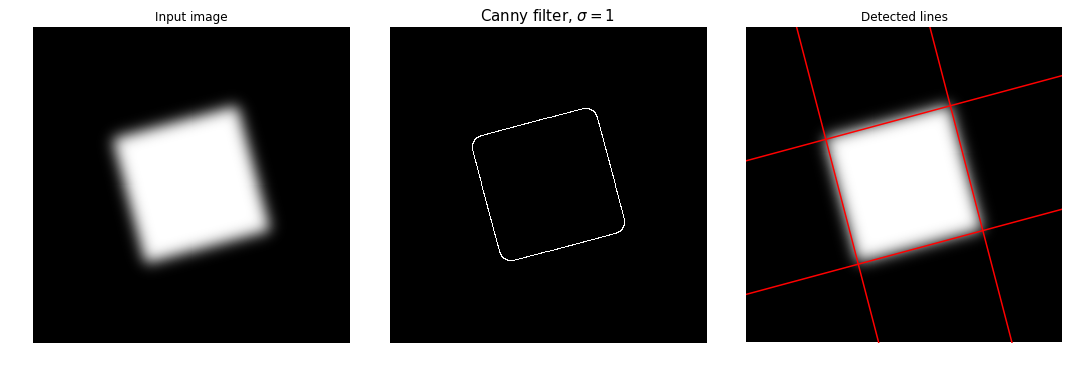

In [15]:
h, theta, d = hough_line(edges1)

fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(im, cmap=cm.gray)
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(edges1, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Canny filter, $\sigma=1$', fontsize=15)

ax[2].imshow(im, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - im.shape[1] * np.cos(angle)) / np.sin(angle)
    ax[2].plot((0, im.shape[1]), (y0, y1), '-r')
ax[2].set_xlim((0, im.shape[1]))
ax[2].set_ylim((im.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')
plt.tight_layout()
plt.show()

## Ejercicio 1
***
Se detecta el tamaño y la ubicacion del centro de una  **volva**

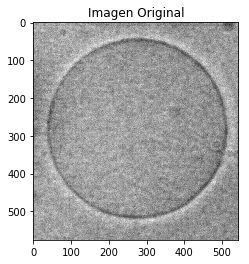

In [16]:
Im1 = pylab.imread("ves_full_150_002.jpg")
#print(Im1)
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

In [17]:
from PIL import Image, ImageFilter,ImageOps
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte
from skimage import data, color

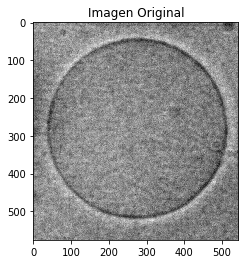

In [18]:
#Im1.show()
Im1=Im1[:,:,0]
pylab.imshow(Im1, cmap = cm.Greys_r)
plt.title('Imagen Original', fontsize=12)
pylab.gray()

In [19]:
im_filtrada = ndimage.gaussian_filter(Im1, sigma=3)
hough_radii = np.arange(200, 275, 2)
edge = feature.canny(im_filtrada)
hough_res = hough_circle(edge,hough_radii)

C:\Users\USER\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


C:\Users\USER\Anaconda3\lib\site-packages\scipy\ndimage\measurements.py:431: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int32 == np.dtype(int).type`.
  safe = ((np.issubdtype(dt, int) and dt.itemsize <= int_size) or


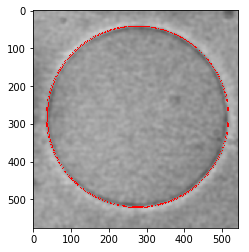

In [20]:
im_filtrada = ndimage.gaussian_filter(Im1, sigma=3)
hough_radii = np.arange(200, 275, 2)
edge = feature.canny(im_filtrada)
hough_res = hough_circle(edge,hough_radii)
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(im_filtrada)
x=0
y=0
radio=0
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (255, 0, 0)
    x=center_x
    y=center_y
    radio=radius

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

### Resultados

In [21]:

print("La posicion de centroide es ( %.1f, %.1f) y el diametro de la vesicula es %.1f pixeles" % (y,x,2*radio))

La posicion de centroide es ( 282.0, 277.0) y el diametro de la vesicula es 480.0 pixeles


In [22]:
import numpy as np
import cv2
from scipy.ndimage import label
import scipy.misc
from skimage.feature import peak_local_max

### Granulometria 1
***
Se debe  hacer un histograma del tamaño de grano de una metalografia.

In [161]:
Im1 = cv2.imread("sv7247243.jpg")
Im1_gray=cv2.cvtColor(Im1,cv2.COLOR_BGR2GRAY)
Im1_gray=ndimage.gaussian_filter(Im1_gray, sigma=1)

k=np.ones((Im1_gray.shape[0],Im1_gray.shape[1]))
#Im1=ndimage.gaussian_filter(Im1, sigma=2)
ret, thresh = cv2.threshold(Im1_gray,220,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [162]:
bf_im = cv2.bilateralFilter(thresh,5,175,175)
edges=cv2.Canny(bf_im,75,200)
_,contorno,hierarchy = cv2.findContours(edges,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contour_list=[]
radios = []
z=200
for c in contorno:
    approx = cv2.approxPolyDP(c,0.01*cv2.arcLength(c,True),True)
    area =cv2.contourArea(c)
    if(area>z):
        radios.append(area)
    if ((len(approx)>8)& (len(approx)<23) & (area>z)) :
        contour_list.append(c)
cv2.drawContours(Im1,contour_list,-1,(255,0,0),2)
cv2.imshow('Granos detectados',Im1)
cv2.waitKey(0)

-1

Text(0,0.5,'Cantidad')

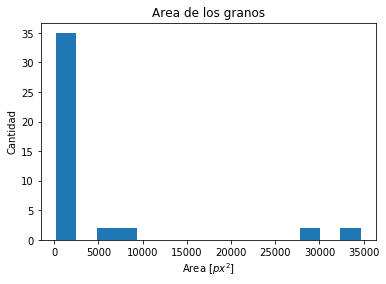

In [164]:
plt.hist(radios,bins=15)
plt.title('Area de los granos')
plt.xlabel('Area [$px^2$]')
plt.ylabel('Cantidad')